<hr>
<h1>Email-EuAll dataset</h1>
<hr>

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist('email_core.txt', create_using = nx.DiGraph(), nodetype = int)
G_undirected = nx.read_edgelist('email_core.txt', create_using = nx.Graph(), nodetype = int)

<hr>
<h1>A. Size of the network</h1>

In [34]:
#number of nodes and edges 
print('number of nodes:',G.number_of_nodes())
print('number of edges:', G.number_of_edges())

number of nodes: 1005
number of edges: 25571


<hr>
<h1>B. Node Degrees</h1>

In [35]:
#nodes with degree 4
nodes_with_degree_four = [val for (nodeID,val) in G.degree() if val==4]
print('number of nodes with degree 4:',len(nodes_with_degree_four))

number of nodes with degree 4: 33


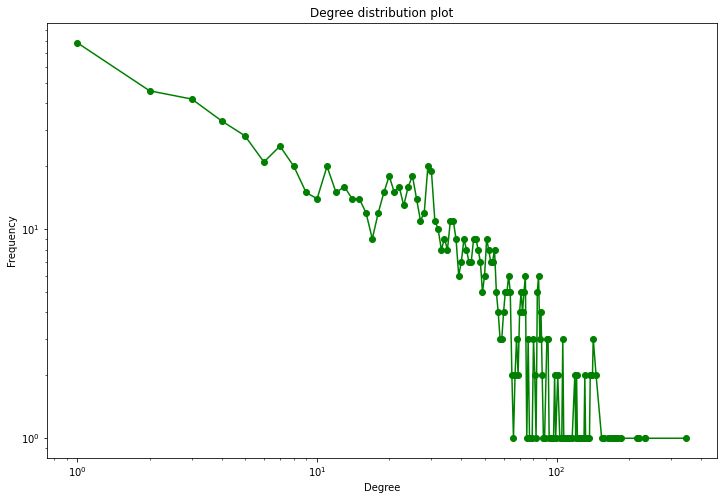

In [36]:
#degree distribution plot
all_degrees =  [val for (node, val) in G_undirected.degree()]
unique_degrees = list(set(all_degrees))

count_of_degrees = []

for i in unique_degrees:
    x = all_degrees.count(i)
    count_of_degrees.append(x)

plt.figure(figsize=(12, 8)) 
plt.loglog(unique_degrees, count_of_degrees,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree distribution plot')
plt.savefig('./plots/deg-dist.jpg')
plt.show()

<hr>
<h1>C. WCC and SCC</h1>


In [37]:
#number of nodes and edges in largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)
subgraph_largest_wcc = G.subgraph(largest_wcc)
print("number of nodes in largest_wcc: ",subgraph_largest_wcc.number_of_nodes())
print("number of edges in largest_wcc: ",subgraph_largest_wcc.number_of_edges())

number of nodes in largest_wcc:  986
number of edges in largest_wcc:  25552


In [38]:
#number of nodes and edges in largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph_largest_scc = G.subgraph(largest_scc)
print("number of nodes in largest_scc: ",subgraph_largest_scc.number_of_nodes())
print("number of edges in largest_scc: ",subgraph_largest_scc.number_of_edges())

number of nodes in largest_scc:  803
number of edges in largest_scc:  24729


<hr>
<h1>D. Average Clustering Coefficient</h1>

In [39]:
#average clustering coefficient
print('Average clustering coefficient:', nx.average_clustering(G)) 

Average clustering coefficient: 0.3656613629131559


<hr>
<h1>E. Triangles and Rectangles</h1>

In [40]:
#number of triangles
number_of_triangles = int(sum(nx.triangles(G_undirected).values()) / 3)
print('number of triangles:',number_of_triangles)




number of triangles: 105461


<hr>
<h1>F. Edge Bridges</h1>

In [41]:
#number of edge bridges
edge_bridges = list(nx.bridges(G_undirected))
print(f'number of edge bridges: {len(edge_bridges)}')

number of edge bridges: 95
